In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
# import dataset

df = pd.read_csv('../data-cleaning/dataset/combineddata.csv')

In [4]:
df.head()

,powder,salt,oil,edible,vegetable,wheat,flour,sugar,chilli,red,...,tocopheryl,triethanolamine,cl,titanium,dioxide,root,stearate,orange,honey,TYPE
0,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Test Ratio:  0.04
f1 score =  1.0
Test Ratio:  0.08
f1 score =  1.0
Test Ratio:  0.12
f1 score =  0.956687370600414
Test Ratio:  0.16
f1 score =  0.9666295884315907
Test Ratio:  0.2
f1 score =  0.9735914839954006
Test Ratio:  0.24000000000000002
f1 score =  0.9331354115124526
Test Ratio:  0.27999999999999997
f1 score =  0.9430288019922568
Test Ratio:  0.32
f1 score =  0.950125313283208
Test Ratio:  0.36
f1 score =  0.9558537237088217
Test Ratio:  0.39999999999999997
f1 score =  0.920085348506401
Test Ratio:  0.44
f1 score =  0.9277738130221233
Test Ratio:  0.48
f1 score =  0.9332345191040844
Test Ratio:  0.52
f1 score =  0.9385451505016722
Test Ratio:  0.56
f1 score =  0.9428260418826457
Test Ratio:  0.6000000000000001
f1 score =  0.9645462171335878
Test Ratio:  0.64
f1 score =  0.9330357142857143
Test Ratio:  0.68
f1 score =  0.9452891335530734
Test Ratio:  0.7200000000000001
f1 score =  0.9407667544629792
Test Ratio:  0.76
f1 score =  0.9370629370629371
Test Ratio:  0.8
f1 score =  0

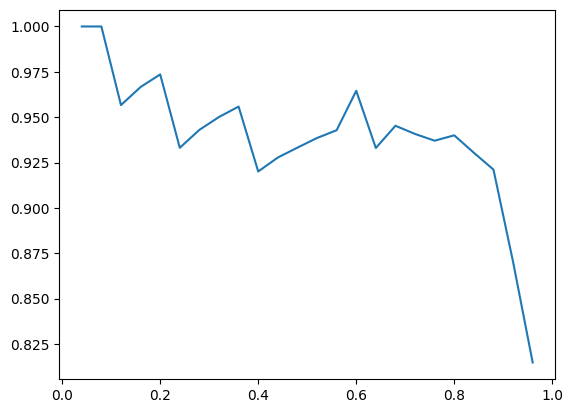

In [16]:
# for i in [0.1, 0.2, 0.33, 0.4]:

f1_score_list = []

# range from 0.05 to 0.95 with step size 0.05
x = np.arange(0.04, 1.0, 0.04)

for i in x:
    print("Test Ratio: ", i)
    X_train, X_test, y_train, y_test = train_test_split(df.drop('TYPE', axis=1), df['TYPE'], test_size=i, random_state=42)
    # Decision Tree

    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    y_predicted = lr.predict(X_test)
    accuracy_score(y_test, y_predicted)*100
    y_predicted_train = lr.predict(X_train)
    accuracy_score(y_train, y_predicted_train)*100
    # cm = confusion_matrix(y_test, y_predicted)
    # cm
    # import matplotlib.pyplot as plt
    # import seaborn as sns

    # plt.figure(figsize=(5,5))
    # sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
    # plt.ylabel('Actual Values')
    # plt.xlabel('Predicted Values')
    # plt.show()

    # print(classification_report(y_test, y_predicted))

    # print f1 score
    from sklearn.metrics import f1_score
    print("f1 score = ", f1_score(y_test, y_predicted, average='weighted'))

    # save f1 score
    f1_score_list.append(f1_score(y_test, y_predicted, average='weighted'))

# plot graph of f1 score vs test ratio
import matplotlib.pyplot as plt
import numpy as np

y = f1_score_list

plt.plot(x, y)

# save the plot
plt.savefig('f1_score_vs_test_ratio.png')





In [6]:
# Cross Validation Score

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 97.27 %
Standard Deviation: 4.17 %
